In [1]:
import matplotlib.pyplot as plt
import pandas as pd, numpy as np,  seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder

In [2]:
from sklearn.compose import ColumnTransformer,  make_column_transformer

In [3]:
from sklearn.pipeline import make_pipeline

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.svm import LinearSVC

In [6]:
from sklearn.neighbors import NearestCentroid

In [7]:
from sklearn.model_selection import cross_val_score

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
df = pd.read_csv("../WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [10]:
cont_column_names = ["MonthlyCharges", "TotalCharges"]

**2.1 Visualize the univariate distribution of each continuous feature, and the distribution of the
target.**

In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [12]:
for col in cont_column_names:
    df[col] = df[col].fillna(df[col].mean())

In [13]:
y_vis_num = []
y_vis = np.array(df["Churn"]).reshape(-1,1)
for element in y_vis:
    if element == "Yes":
        y_vis_num.append(1)
    else:
        y_vis_num.append(0)

/home/andres/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


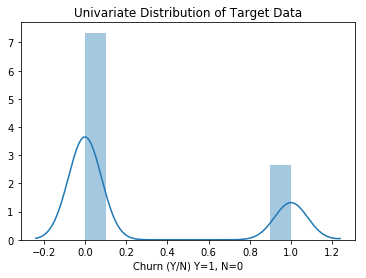

In [14]:
fig = sns.distplot(y_vis_num);
plt.xlabel("Churn (Y/N) Y=1, N=0")
plt.title(r'Univariate Distribution of ' + "Target Data")
plt.show(fig)

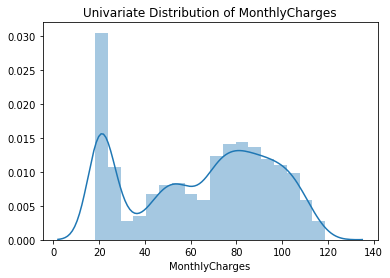

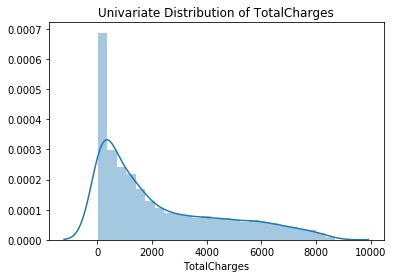

In [15]:
for name in cont_column_names:
    data = df[name]
    fig = sns.distplot(np.array(data.dropna()));
    plt.xlabel(name)
    plt.title(r'Univariate Distribution of ' + str(name))
    plt.show(fig)

**2.2 Split data into training and test set. Build a pipeline for dealing with categorical variables. Evaluate Logistic Regression, linear support vector machines and nearest centroids using
cross-validation. How different are the results? How does scaling the continuous features with
StandardScaler influence the results?**

In [16]:
cats_names = ["gender","Partner","Dependents","PhoneService","InternetService", "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport", "StreamingTV","StreamingMovies","Contract", "PaperlessBilling", "PaymentMethod", "Churn"]

In [17]:
for col in cats_names:
    df[col] = df[col].fillna("no_category")

In [18]:
#perform data split
df_train = df.sample(frac = 0.7)
train_ix = list(df_train.index.get_values())

df_test = df.loc[~df.index.isin(train_ix)]

In [19]:
#remove target from categorical features
del cats_names[len(cats_names)-1]

In [20]:
y = np.array(df_train["Churn"]).reshape(-1,1)

In [21]:
#build pipeline for dealing with categorical variables
preprocess = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'), cats_names)
)

In [22]:
logistic_pipeline = make_pipeline(preprocess, LogisticRegression())
svc_pipeline = make_pipeline(preprocess, LinearSVC())
nearestcentroid_pipeline = make_pipeline(preprocess, NearestCentroid())

In [ ]:
logistic_scores = cross_val_score(logistic_pipeline, df_train, y, cv=3)
svc_scores = cross_val_score(svc_pipeline, df_train, y, cv=3)
nearestcentroid_scores = cross_val_score(nearestcentroid_pipeline, df_train, y, cv=3)

With Scaling

In [23]:
scaled_preprocess = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'), cats_names),
    (StandardScaler(), cont_column_names)
)

In [24]:
scaled_logistic_pipeline = make_pipeline(scaled_preprocess, LogisticRegression())
scaled_svc_pipeline = make_pipeline(scaled_preprocess, LinearSVC())
scaled_nearestcentroid_pipeline = make_pipeline(scaled_preprocess, NearestCentroid())

In [ ]:
scaled_logistic_scores = cross_val_score(scaled_logistic_pipeline, df_train, y, cv=3)
scaled_svc_scores = cross_val_score(scaled_svc_pipeline, df_train, y, cv=3)
scaled_nearestcentroid_scores = cross_val_score(scaled_nearestcentroid_pipeline, df_train, y, cv=3)

In [47]:
print(str(logistic_scores) + " " + str(scaled_logistic_scores))
print(str(svc_scores) + " " + str(scaled_svc_scores))
print(str(nearestcentroid_scores) + " " + str(scaled_nearestcentroid_scores))

[0.79683698 0.77297626 0.79245283] [0.81021898 0.78819233 0.80523433]
[0.79257908 0.77297626 0.80097383] [0.80961071 0.78940962 0.80219111]
[0.71167883 0.68959221 0.69872185] [0.72506083 0.69872185 0.70480828]


The results in the codeblock above show that scaling the continuous features improves performance.

**2.3 Tune the parameters using GridSearchCV. Do the results improve?
Visualize the performance as function of the parameters for all three models.**

In [125]:
results = {}

In [126]:
from sklearn.model_selection import GridSearchCV

In [127]:
y_num = []

In [128]:
for element in y:
    if element == "Yes":
        y_num.append(1)
    else:
        y_num.append(0)

In [129]:
y_num = np.array(y_num)

In [130]:
logistic_param_grid = {'logisticregression__C': 1.0/np.logspace(-3, 3, 13)}

In [131]:
logistic_grid = GridSearchCV(scaled_logistic_pipeline, logistic_param_grid, cv=10, scoring = "accuracy")

In [ ]:
logistic_grid.fit(df_train, y_num)

In [133]:
print(logistic_grid.best_params_)

{'logisticregression__C': 0.31622776601683794}


In [136]:
results["logistic_stratified"] = [logistic_grid.best_params_, np.mean(logistic_grid.cv_results_["mean_test_score"])]

In [137]:
a = []

for i in range(13):
    a.append(i)

In [138]:
target_data = logistic_grid.cv_results_["mean_test_score"]
x = 1.0/np.logspace(-3, 3, 13)

In [139]:
x = list(x)

In [140]:
for i in range(len(x)):
    x[i] = str(x[i])[:5]

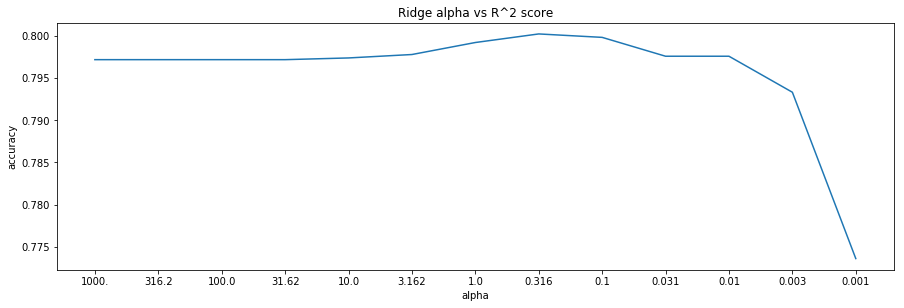

In [141]:
fig= plt.figure(1, figsize=(15,10))
ax1  = fig.add_subplot(211)
#ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.xaxis.set_ticks(a) #set the ticks to be a
ax1.xaxis.set_ticklabels(x)

ax1.set_xlabel("alpha")
ax1.set_ylabel("accuracy")
ax1.set_title("Ridge alpha vs R^2 score")

ax1.plot(a, target_data)

In [142]:
svc_param_grid = {'linearsvc__C': np.logspace(-3, 2, 6)}

In [143]:
svc_grid = GridSearchCV(scaled_svc_pipeline, svc_param_grid, cv=10, scoring = "accuracy")

In [ ]:
svc_grid.fit(df_train, y_num)

In [145]:
print(svc_grid.best_params_)

{'linearsvc__C': 0.01}


In [146]:
results["svc_stratified"] = [svc_grid.best_params_, np.mean(svc_grid.cv_results_["mean_test_score"])]

In [147]:
a2 = []

for i in range(len(np.logspace(-3, 2, 6))):
    a2.append(i)

In [148]:
x = np.logspace(-3, 2, 6)

In [149]:
x = list(x)

In [150]:
for i in range(len(x)):
    x[i] = str(x[i])[:5]

In [151]:
target_data = svc_grid.cv_results_["mean_test_score"]

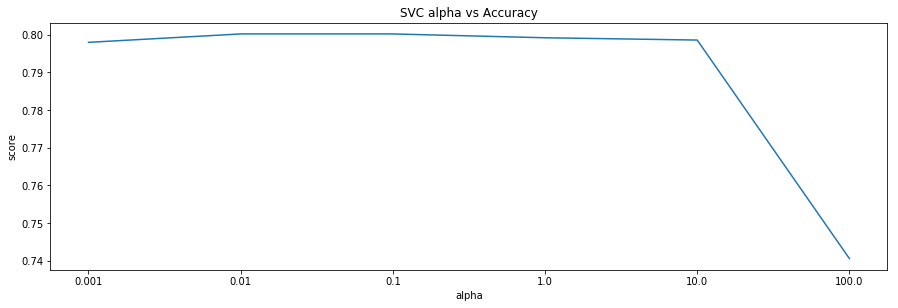

In [152]:
fig= plt.figure(1, figsize=(15,10))
ax1  = fig.add_subplot(211)
#ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.xaxis.set_ticks(a2) #set the ticks to be a
ax1.xaxis.set_ticklabels(x)

ax1.set_xlabel("alpha")
ax1.set_ylabel("score")
ax1.set_title("SVC alpha vs Accuracy")

ax1.plot(a2, target_data)

In [153]:
nearestcentroid_param_grid = {'nearestcentroid__metric': ["euclidean", "manhattan"],
                              'nearestcentroid__shrink_threshold':  [None, .2, .4]}

In [154]:
nearestcentroid_grid = GridSearchCV(scaled_nearestcentroid_pipeline, nearestcentroid_param_grid, cv=10)

In [155]:
nearestcentroid_grid.fit(df_train, y_num)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('onehotencoder', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='ignore',
   ...TotalCharges'])])), ('nearestcentroid', NearestCentroid(metric='euclidean', shrink_threshold=None))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'nearestcentroid__metric': ['euclidean', 'manhattan'], 'nearestcentroid__shrink_threshold': [None, 0.2, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [156]:
results["nc_stratified"] = [svc_grid.best_params_, np.mean(nearestcentroid_grid.cv_results_["mean_test_score"])]

In [157]:
nearestcentroid_grid.best_params_

{'nearestcentroid__metric': 'euclidean',
 'nearestcentroid__shrink_threshold': None}

In [158]:
nearestcentroid_grid.cv_results_["mean_test_score"]



array([0.71602434, 0.71440162, 0.71338742, 0.70040568, 0.70466531,
       0.70791075])

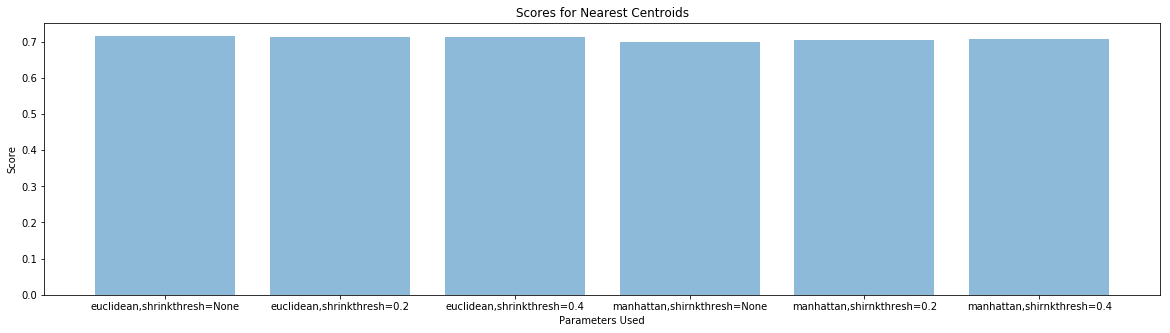

In [159]:
objects = ["euclidean,shrinkthresh=None", "euclidean,shrinkthresh=0.2",
           "euclidean,shrinkthresh=0.4","manhattan,shirnkthresh=None"
          ,"manhattan,shirnkthresh=0.2","manhattan,shirnkthresh=0.4"]
values = nearestcentroid_grid.cv_results_["mean_test_score"]
y_pos = np.arange(len(objects))

plt.figure(figsize=(20,5))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.xlabel("Parameters Used")
plt.title("Scores for Nearest Centroids")
plt.show()

**2.4 Change the cross-validation strategy from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the
parameters that are found change? Do they change if you change the random seed of the
shuffling? Or if you change the random state of the split into training and test data?**

In [160]:
from sklearn.model_selection import ShuffleSplit

In [161]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

In [162]:
logistic_param_grid = {'logisticregression__C': 1.0/np.logspace(-3, 3, 13)}

In [163]:
logistic_grid = GridSearchCV(scaled_logistic_pipeline, logistic_param_grid, cv=cv)

In [ ]:
logistic_grid.fit(df_train, y_num)

In [165]:
print(logistic_grid.best_params_)

{'logisticregression__C': 10.0}


In [166]:
results["logistic_kfold_seed0"] = [logistic_grid.best_params_, np.mean(logistic_grid.cv_results_["mean_test_score"])]

In [167]:
target_data = logistic_grid.cv_results_["mean_test_score"]
x = 1.0/np.logspace(-3, 3, 13)

In [168]:
x = list(x)

In [169]:
for i in range(len(x)):
    x[i] = str(x[i])[:5]

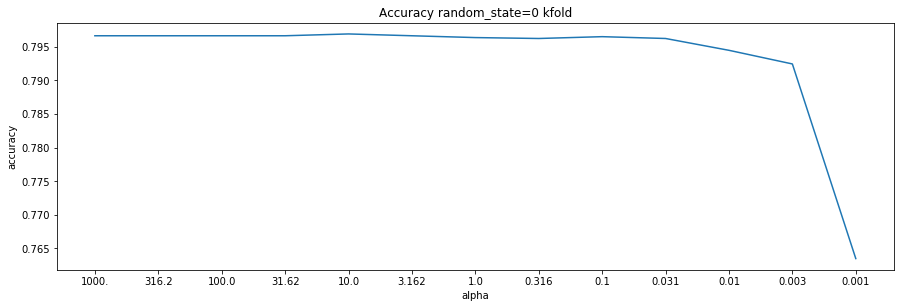

In [170]:
fig= plt.figure(1, figsize=(15,10))
ax1  = fig.add_subplot(211)
#ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.xaxis.set_ticks(a) #set the ticks to be a
ax1.xaxis.set_ticklabels(x)

ax1.set_xlabel("alpha")
ax1.set_ylabel("accuracy")
ax1.set_title("Accuracy random_state=0 kfold")

ax1.plot(a, target_data)

In [171]:
svc_param_grid = {'linearsvc__C': np.logspace(-3, 2, 6)}

In [172]:
svc_grid = GridSearchCV(scaled_svc_pipeline, svc_param_grid, cv=cv)

In [ ]:
svc_grid.fit(df_train, y_num)

In [174]:
print(svc_grid.best_params_)

{'linearsvc__C': 1.0}


In [175]:
results["svc_kfold_seed0"] = [svc_grid.best_params_,np.mean(svc_grid.cv_results_["mean_test_score"])]

In [176]:
x = np.logspace(-3, 2, 6)

In [177]:
x = list(x)

In [178]:
for i in range(len(x)):
    x[i] = str(x[i])[:5]

In [179]:
target_data = svc_grid.cv_results_["mean_test_score"]

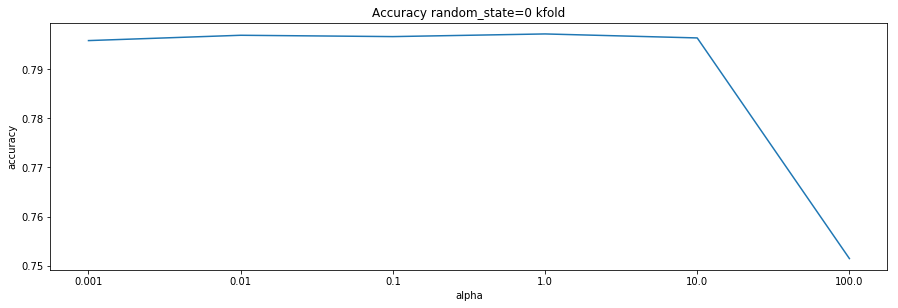

In [180]:
fig= plt.figure(1, figsize=(15,10))
ax1  = fig.add_subplot(211)
#ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.xaxis.set_ticks(a2) #set the ticks to be a
ax1.xaxis.set_ticklabels(x)

ax1.set_xlabel("alpha")
ax1.set_ylabel("accuracy")
ax1.set_title("Accuracy random_state=0 kfold")

ax1.plot(a2, target_data)

In [181]:
nearestcentroid_param_grid = {'nearestcentroid__metric': ["euclidean", "manhattan"],
                              'nearestcentroid__shrink_threshold':  [None, .2, .4]}

In [182]:
nearestcentroid_grid = GridSearchCV(scaled_nearestcentroid_pipeline, nearestcentroid_param_grid, cv=cv)

In [183]:
nearestcentroid_grid.fit(df_train, y_num)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=0, test_size=0.3, train_size=None),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('onehotencoder', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='ignore',
   ...TotalCharges'])])), ('nearestcentroid', NearestCentroid(metric='euclidean', shrink_threshold=None))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'nearestcentroid__metric': ['euclidean', 'manhattan'], 'nearestcentroid__shrink_threshold': [None, 0.2, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [184]:
nearestcentroid_grid.best_params_

{'nearestcentroid__metric': 'euclidean',
 'nearestcentroid__shrink_threshold': None}

In [185]:
nearestcentroid_grid.cv_results_["mean_test_score"]

array([0.70791075, 0.70709939, 0.70615281, 0.69073698, 0.69371197,
       0.69925625])

In [187]:
results["nc_kfold_seed0"] = 
[nearestcentroid_grid.best_params_, np.mean(nearestcentroid_grid.cv_results_["mean_test_score"])]

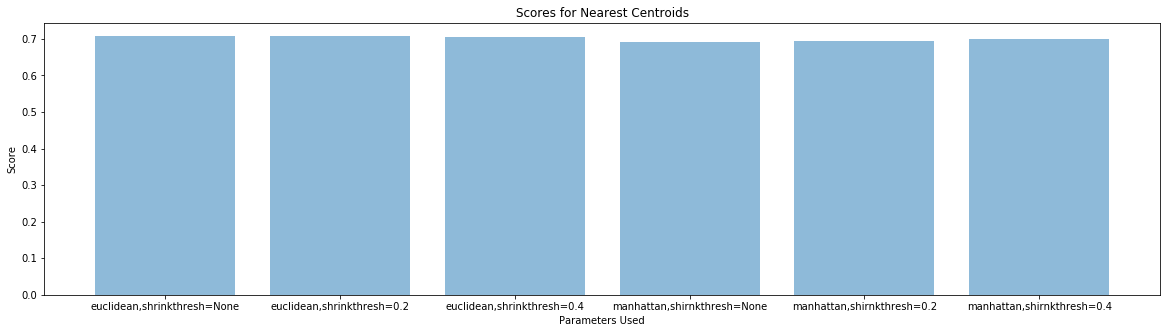

In [188]:
objects = ["euclidean,shrinkthresh=None", "euclidean,shrinkthresh=0.2",
           "euclidean,shrinkthresh=0.4","manhattan,shirnkthresh=None"
          ,"manhattan,shirnkthresh=0.2","manhattan,shirnkthresh=0.4"]
values = nearestcentroid_grid.cv_results_["mean_test_score"]
y_pos = np.arange(len(objects))

plt.figure(figsize=(20,5))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.xlabel("Parameters Used")
plt.title("Scores for Nearest Centroids")
plt.show()

## Changing Seed of Random State

In [99]:
cv2 = ShuffleSplit(n_splits=5, test_size=0.3, random_state=50)

In [189]:
logistic_grid = GridSearchCV(scaled_logistic_pipeline, logistic_param_grid, cv=cv2)

In [ ]:
logistic_grid.fit(df_train, y_num)

In [191]:
print(logistic_grid.best_params_)

{'logisticregression__C': 1.0}


In [194]:
results["logistic_kfold_seed50"] = [svc_grid.best_params_, np.mean(logistic_grid.cv_results_["mean_test_score"])]

In [195]:
target_data = logistic_grid.cv_results_["mean_test_score"]
x = 1.0/np.logspace(-3, 3, 13)

In [196]:
x = list(x)

In [197]:
for i in range(len(x)):
    x[i] = str(x[i])[:5]

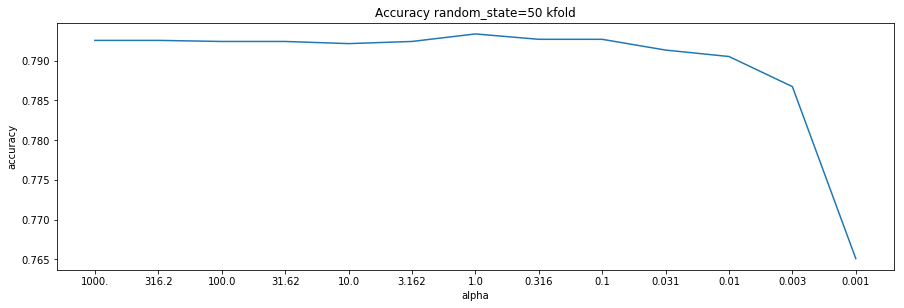

In [198]:
fig= plt.figure(1, figsize=(15,10))
ax1  = fig.add_subplot(211)
#ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.xaxis.set_ticks(a) #set the ticks to be a
ax1.xaxis.set_ticklabels(x)

ax1.set_xlabel("alpha")
ax1.set_ylabel("accuracy")
ax1.set_title("Accuracy random_state=50 kfold")

ax1.plot(a, target_data)

In [108]:
svc_param_grid = {'linearsvc__C': np.logspace(-3, 2, 6)}

In [199]:
svc_grid = GridSearchCV(scaled_svc_pipeline, svc_param_grid, cv=cv2)

In [ ]:
svc_grid.fit(df_train, y_num)

In [201]:
print(svc_grid.best_params_)

{'linearsvc__C': 0.01}


In [202]:
results["svc_kfold_seed50"] = [svc_grid.best_params_, np.mean(svc_grid.cv_results_["mean_test_score"])]

In [203]:
x = np.logspace(-3, 2, 6)

In [204]:
x = list(x)

In [205]:
for i in range(len(x)):
    x[i] = str(x[i])[:5]

In [206]:
target_data = svc_grid.cv_results_["mean_test_score"]

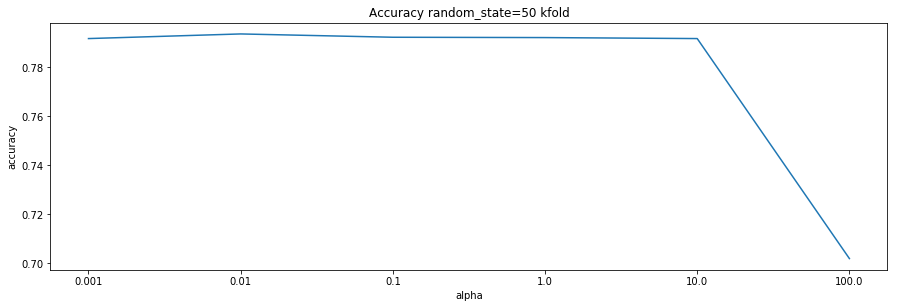

In [207]:
fig= plt.figure(1, figsize=(15,10))
ax1  = fig.add_subplot(211)
#ax1.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.xaxis.set_ticks(a2) #set the ticks to be a
ax1.xaxis.set_ticklabels(x)

ax1.set_xlabel("alpha")
ax1.set_ylabel("accuracy")
ax1.set_title("Accuracy random_state=50 kfold")

ax1.plot(a2, target_data)

In [208]:
nearestcentroid_grid = GridSearchCV(scaled_nearestcentroid_pipeline, nearestcentroid_param_grid, cv=cv2)

In [209]:
nearestcentroid_grid.fit(df_train, y_num)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=50, test_size=0.3, train_size=None),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('columntransformer', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('onehotencoder', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='ignore',
   ...TotalCharges'])])), ('nearestcentroid', NearestCentroid(metric='euclidean', shrink_threshold=None))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'nearestcentroid__metric': ['euclidean', 'manhattan'], 'nearestcentroid__shrink_threshold': [None, 0.2, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [215]:
results["nc_kfold_seed50"] =
[nearestcentroid_grid.best_params_, np.mean(nearestcentroid_grid.cv_results_["mean_test_score"])]

In [211]:
nearestcentroid_grid.best_params_

{'nearestcentroid__metric': 'euclidean',
 'nearestcentroid__shrink_threshold': None}

In [212]:
nearestcentroid_grid.cv_results_["mean_test_score"]

array([0.71345504, 0.71102096, 0.71088573, 0.68965517, 0.69601082,
       0.69885057])

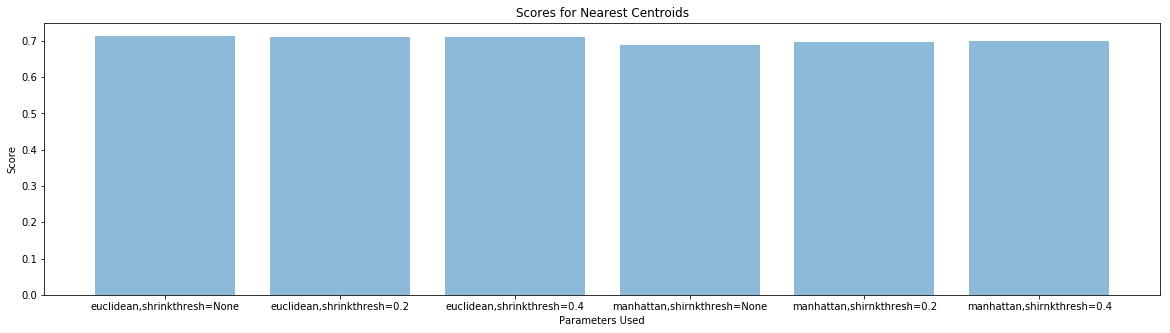

In [213]:
objects = ["euclidean,shrinkthresh=None", "euclidean,shrinkthresh=0.2",
           "euclidean,shrinkthresh=0.4","manhattan,shirnkthresh=None"
          ,"manhattan,shirnkthresh=0.2","manhattan,shirnkthresh=0.4"]
values = nearestcentroid_grid.cv_results_["mean_test_score"]
y_pos = np.arange(len(objects))

plt.figure(figsize=(20,5))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.xlabel("Parameters Used")
plt.title("Scores for Nearest Centroids")
plt.show()

Results displays all the best parameters for different random seeds and cross-validation parameters

In [216]:
results

{'logistic_stratified': [{'logisticregression__C': 0.31622776601683794},
  0.7957715712279606],
 'svc_stratified': [{'linearsvc__C': 0.01}, 0.7894523326572008],
 'nc_stratified': [{'linearsvc__C': 0.01}, 0.7094658553076404],
 'logistic_kfold_seed0': [{'logisticregression__C': 10.0}, 0.7935091277890467],
 'svc_kfold_seed0': [{'linearsvc__C': 1.0}, 0.7890466531440162],
 'nc_kfold_seed0': [{'nearestcentroid__metric': 'euclidean',
   'nearestcentroid__shrink_threshold': None},
  0.700811359026369],
 'logistic_kfold_seed50': [{'linearsvc__C': 1.0}, 0.7897747958599886],
 'svc_kfold_seed50': [{'linearsvc__C': 0.01}, 0.7772368717601982],
 'nc_kfold_seed50': [{'nearestcentroid__metric': 'euclidean',
   'nearestcentroid__shrink_threshold': None},
  0.7033130493576741]}

**Answer**
The cross validation scores are vey similar regardless of whether k-fold or stratified kfold are used. The random seed also does not seem to make a significant difference.

**2.5 Visualize the coefficients for LogisticRegression and Linear Support Vector Machines using
hyper-parameters that performed well in the grid-search.**

The results dictionary below contains the best parameters for problems 2.3 and 2.4

In [217]:
results

{'logistic_stratified': [{'logisticregression__C': 0.31622776601683794},
  0.7957715712279606],
 'svc_stratified': [{'linearsvc__C': 0.01}, 0.7894523326572008],
 'nc_stratified': [{'linearsvc__C': 0.01}, 0.7094658553076404],
 'logistic_kfold_seed0': [{'logisticregression__C': 10.0}, 0.7935091277890467],
 'svc_kfold_seed0': [{'linearsvc__C': 1.0}, 0.7890466531440162],
 'nc_kfold_seed0': [{'nearestcentroid__metric': 'euclidean',
   'nearestcentroid__shrink_threshold': None},
  0.700811359026369],
 'logistic_kfold_seed50': [{'linearsvc__C': 1.0}, 0.7897747958599886],
 'svc_kfold_seed50': [{'linearsvc__C': 0.01}, 0.7772368717601982],
 'nc_kfold_seed50': [{'nearestcentroid__metric': 'euclidean',
   'nearestcentroid__shrink_threshold': None},
  0.7033130493576741]}

**Preprocess the data**

In [218]:
X =  scaled_preprocess.fit_transform(df_train)

In [219]:
y_num

array([0, 0, 0, ..., 0, 1, 1])

In [220]:
onehotcat_feature_names = list(scaled_preprocess.named_transformers_['onehotencoder'].get_feature_names())

In [221]:
all_col_names_transformed = np.array(onehotcat_feature_names + cont_column_names)

**Produce Visualizations**

In [222]:
clf = LinearSVC(C=0.01)

In [223]:
svc = clf.fit(X, y_num)

In [224]:
log = LogisticRegression(C=0.01).fit(X, y_num)

/home/andres/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [225]:
svc_c = abs(svc.coef_).flatten().argsort()[-10:][::-1]
log_c = abs(log.coef_).flatten().argsort()[-10:][::-1]

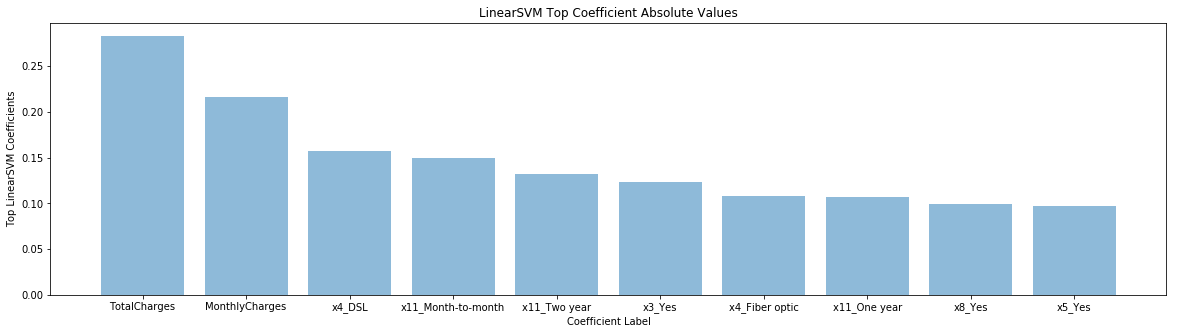

In [230]:
objects = all_col_names_transformed[svc_c]
y_pos = np.arange(len(objects))
values = np.array(abs(svc.coef_.flatten()[svc_c]))
plt.figure(figsize=(20,5))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel("Top LinearSVM Coefficients")
plt.xlabel("Coefficient Label")
plt.title("LinearSVM Top Coefficient Absolute Values")
plt.show()

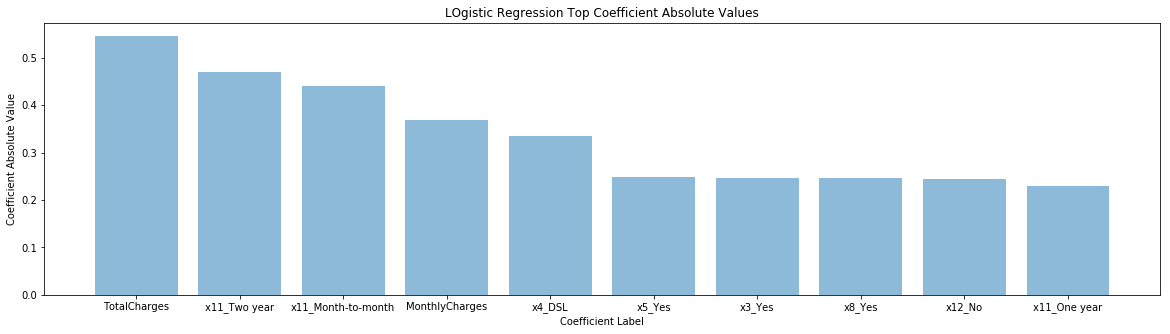

In [231]:
objects = all_col_names_transformed[log_c]
values = np.array(abs(log.coef_.flatten()[log_c]))
plt.figure(figsize=(20,5))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Coefficient Absolute Value')
plt.xlabel("Coefficient Label")
plt.title("LOgistic Regression Top Coefficient Absolute Values")
plt.show()